In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
import numpy as np
from sklearn.model_selection import train_test_split
import mlflow
from torchinfo import summary

In [2]:
# Read in white wine data
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';')

# Read in red wine data
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';')

In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
# Add `type` column to `red` with price one
red['type'] = 1

# Add `type` column to `white` with price zero
white['type'] = 0

In [5]:
# Append `white` to `red`
wines = pd.concat([red, white], ignore_index=True)

In [6]:
wines

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [7]:
X = wines.drop('type', axis=1).values
y = wines['type'].values
# X = wines.drop('type', axis=1)
# y = wines['type']

In [8]:
X.shape, y.shape

((6497, 12), (6497,))

In [9]:
X_tensor = torch.Tensor(X)
y_tensor = torch.Tensor(y)
y_tensor = y_tensor.type(torch.LongTensor)
#y_tensor = y_tensor.unsqueeze(1)

In [10]:
X_train, X_temp, y_train, y_temp = train_test_split(X_tensor, y_tensor, test_size = 0.2, random_state = 42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size = 0.95, random_state = 42)
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size = 0.2, random_state = 42)
# X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size = 0.95, random_state = 42)

In [17]:
X_test.reset_index(drop= True , inplace= True )

AttributeError: 'Tensor' object has no attribute 'reset_index'

In [67]:
X_train.numpy()

array([[6.60e+00, 2.40e-01, 3.50e-01, ..., 3.70e-01, 1.05e+01, 5.00e+00],
       [8.30e+00, 2.80e-01, 4.80e-01, ..., 6.20e-01, 1.24e+01, 7.00e+00],
       [7.70e+00, 7.15e-01, 1.00e-02, ..., 5.70e-01, 1.18e+01, 6.00e+00],
       ...,
       [6.40e+00, 3.70e-01, 2.00e-01, ..., 4.30e-01, 9.50e+00, 5.00e+00],
       [6.50e+00, 2.60e-01, 5.00e-01, ..., 4.70e-01, 9.50e+00, 5.00e+00],
       [7.20e+00, 6.20e-01, 6.00e-02, ..., 5.40e-01, 9.50e+00, 5.00e+00]],
      dtype=float32)

In [213]:
#create JSON file
json_file = X_test.to_json (orient='split', index=False)

#export JSON file
with open('/content/drive/MyDrive/Colab Notebooks/Alfa/Data_wine.json', 'w') as f:
 f.write(json_file)

In [217]:
X_test

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.4,0.350,0.56,13.8,0.048,55.0,190.0,0.99930,3.07,0.58,9.4,6
1,5.6,0.185,0.19,7.1,0.048,36.0,110.0,0.99438,3.26,0.41,9.5,6
2,6.6,0.380,0.36,9.2,0.061,42.0,214.0,0.99760,3.31,0.56,9.4,5
3,8.5,0.220,0.34,0.7,0.040,5.0,25.0,0.99180,3.04,0.37,10.5,4
4,6.5,0.280,0.34,3.6,0.040,29.0,121.0,0.99111,3.28,0.48,12.1,7
...,...,...,...,...,...,...,...,...,...,...,...,...
60,7.5,0.630,0.27,2.0,0.083,17.0,91.0,0.99616,3.26,0.58,9.8,6
61,7.2,0.390,0.54,1.4,0.157,34.0,132.0,0.99449,3.11,0.53,9.0,6
62,8.0,0.705,0.05,1.9,0.074,8.0,19.0,0.99620,3.34,0.95,10.5,6
63,7.4,0.360,0.33,1.4,0.025,27.0,55.0,0.99150,3.21,0.33,11.2,6


In [214]:
data = np.where(y_test == 0, 'white', 'red')

In [215]:
wine_data = {'type': data.tolist()}

In [216]:
import json
with open('/content/drive/MyDrive/Colab Notebooks/Alfa/Wine_type.json', 'w') as json_file:
    json.dump(wine_data, json_file)

In [11]:
X_train.shape, X_test.shape, X_valid.shape

(torch.Size([5197, 12]), torch.Size([65, 12]), torch.Size([1235, 12]))

In [12]:
y_train.shape, y_test.shape, y_valid.shape

(torch.Size([5197]), torch.Size([65]), torch.Size([1235]))

In [13]:
batch_size = 32

In [14]:
# Создание наборов данных
train_dataset = TensorDataset(X_train, y_train)
valid_dataset = TensorDataset(X_valid, y_valid)
test_dataset = TensorDataset(X_test, y_test)

# Создание DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [57]:
# Build model with non-linear activation function
from torch import nn

In [104]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineClassifier, self).__init__()
        self.liner_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.liner_2 = nn.Linear(hidden_size, 64)
        self.drop = nn.Dropout(0.1)
        self.fc = nn.Linear(64, output_size)

    def forward(self, x):
        out = self.liner_1(x)
        out = self.relu(out)
        out = self.drop(out)
        out = self.liner_2(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [105]:
def train(model, optimizer, loss_fn, train_loader, val_loader, epochs=5, device="cpu"):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for batch in train_loader:
            optimizer.zero_grad()
            inputs, targets = batch
            inputs = inputs.to(device)
            targets = targets.to(device)
            output = model(inputs)
            loss = loss_fn(output, targets)
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)

        model.eval()
        num_correct = 0
        num_examples = 0
        for batch in val_loader:
            inputs, targets = batch
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.to(device)
            loss = loss_fn(output,targets)
            valid_loss += loss.data.item() * inputs.size(0)

            correct = torch.eq(torch.max(F.softmax(output, dim=1), dim=1)[1], targets).view(-1)
            num_correct += torch.sum(correct).item()
            num_examples += correct.shape[0]
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))

In [ ]:
y = model(X_test)

In [84]:
y_test.shape

torch.Size([65])

In [85]:
loss = criterion(y,y_test.unsqueeze(1))

### MLFlow

In [18]:
input_size = 12
hidden_size = 32
output_size = 2
learning_rate = 0.001
num_epochs = 25
model = WineClassifier(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"

with mlflow.start_run():
    params = {
        "epochs": num_epochs,
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "loss_function": criterion.__class__.__name__,
        "optimizer": optimizer.__class__.__name__,
        "input_size": 12,
        "hidden_size": 32,
        "output_size": 2,
        "device": device
    }
    # Log training parameters.
    mlflow.log_params(params)

    # Log model summary.
    with open("model_summary.txt", "w", encoding="utf-8") as f:
        f.write(str(summary(model)))
    mlflow.log_artifact("model_summary.txt")

    train(model, optimizer, criterion, train_loader, valid_loader, epochs=num_epochs, device=device)
    
    # Save the trained model to MLflow.
    mlflow.pytorch.log_model(model, "model")

Epoch: 0, Training Loss: 0.2757, Validation Loss: 0.2305, accuracy = 0.9206
Epoch: 1, Training Loss: 0.2052, Validation Loss: 0.2217, accuracy = 0.9328
Epoch: 2, Training Loss: 0.1905, Validation Loss: 0.2032, accuracy = 0.9352
Epoch: 3, Training Loss: 0.1684, Validation Loss: 0.2198, accuracy = 0.9287
Epoch: 4, Training Loss: 0.1601, Validation Loss: 0.1649, accuracy = 0.9401
Epoch: 5, Training Loss: 0.1468, Validation Loss: 0.1540, accuracy = 0.9538
Epoch: 6, Training Loss: 0.1356, Validation Loss: 0.1377, accuracy = 0.9530
Epoch: 7, Training Loss: 0.1235, Validation Loss: 0.1303, accuracy = 0.9555
Epoch: 8, Training Loss: 0.1171, Validation Loss: 0.1347, accuracy = 0.9522
Epoch: 9, Training Loss: 0.1078, Validation Loss: 0.1291, accuracy = 0.9603
Epoch: 10, Training Loss: 0.1017, Validation Loss: 0.1203, accuracy = 0.9644
Epoch: 11, Training Loss: 0.0987, Validation Loss: 0.1194, accuracy = 0.9660
Epoch: 12, Training Loss: 0.0948, Validation Loss: 0.1116, accuracy = 0.9692
Epoch: 13

Q:\Python\Anaconda\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


### MLFlow 2 

In [96]:
class WineClassifier(nn.Module, PythonModel):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineClassifier, self).__init__()
        self.liner_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.liner_2 = nn.Linear(hidden_size, 64)
        self.drop = nn.Dropout(0.1)
        self.fc = nn.Linear(64, output_size)

    def forward(self, x):
        out = self.liner_1(x)
        out = self.relu(out)
        out = self.drop(out)
        out = self.liner_2(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [97]:
input_size = 12
hidden_size = 32
output_size = 2
learning_rate = 0.001
num_epochs = 25
model = WineClassifier(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"
    
with mlflow.start_run():
    params = {
        "epochs": num_epochs,
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "loss_function": criterion.__class__.__name__,
        "optimizer": optimizer.__class__.__name__,
        "input_size": 12,
        "hidden_size": 32,
        "output_size": 2,
        "device": device
    }
    # Log training parameters.
    mlflow.log_params(params)

    # Log model summary.
    with open("model_summary.txt", "w", encoding="utf-8") as f:
        f.write(str(summary(model)))
    mlflow.log_artifact("model_summary.txt")

    train(model, optimizer, criterion, train_loader, valid_loader, epochs=num_epochs, device=device)
    
    # Save the trained model to MLflow.
    mlflow.pytorch.log_model(model, "model_wine_class")

Epoch: 0, Training Loss: 0.3161, Validation Loss: 0.2196, accuracy = 0.9279
Epoch: 1, Training Loss: 0.1933, Validation Loss: 0.2056, accuracy = 0.9328
Epoch: 2, Training Loss: 0.1762, Validation Loss: 0.1925, accuracy = 0.9304
Epoch: 3, Training Loss: 0.1721, Validation Loss: 0.1768, accuracy = 0.9377
Epoch: 4, Training Loss: 0.1595, Validation Loss: 0.1626, accuracy = 0.9433
Epoch: 5, Training Loss: 0.1497, Validation Loss: 0.1577, accuracy = 0.9457
Epoch: 6, Training Loss: 0.1478, Validation Loss: 0.1454, accuracy = 0.9474
Epoch: 7, Training Loss: 0.1335, Validation Loss: 0.1472, accuracy = 0.9522
Epoch: 8, Training Loss: 0.1294, Validation Loss: 0.1538, accuracy = 0.9530
Epoch: 9, Training Loss: 0.1208, Validation Loss: 0.1334, accuracy = 0.9563
Epoch: 10, Training Loss: 0.1208, Validation Loss: 0.1269, accuracy = 0.9603
Epoch: 11, Training Loss: 0.1167, Validation Loss: 0.1239, accuracy = 0.9595
Epoch: 12, Training Loss: 0.1070, Validation Loss: 0.1314, accuracy = 0.9628
Epoch: 13

In [100]:
logged_model = f"runs:/b56dcd2a30474511b28e61e07cf73919/model_wine_class"
loaded_model = mlflow.pyfunc.load_model(logged_model)
PATH_X_data = './Data_wine.json'
X_test = pd.read_json(PATH_X_data, orient='split')
outputs = loaded_model.predict(X_test)

In [101]:
outputs

,0,1
0,5.519547,-2.332828
1,3.885866,-2.118336
2,5.975141,-2.472467
3,0.349096,0.162678
4,4.277761,-2.564372
...,...,...
60,-0.024931,1.116817
61,2.444933,-0.851327
62,-4.740518,5.500774
63,0.242847,0.313418


In [ ]:
predictions = make_predictions(model, test_loader)

In [ ]:
predictions

In [170]:
# Получение истинных меток и предсказанных меток
true_labels = torch.tensor([label for _, label in test_dataset])
predicted_labels = torch.tensor(predictions)

In [146]:
model.eval()
with torch.inference_mode():
    outputs = model(X_test.to(device))

In [ ]:
outputs

In [108]:
true_labels

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
        1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1.,
        1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.])

### Wine Classifier V2

In [43]:
class WineClassifier(nn.Module):
    def __init__(self, input_size, hidden_size):
        super(WineClassifier, self).__init__()
        self.liner_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.liner_2 = nn.Linear(hidden_size, 64)
        self.drop = nn.Dropout(0.1)
        self.fc = nn.Linear(64, 2)  # output_size = 2 для двух классов

    def forward(self, x):
        out = self.liner_1(x)
        out = self.relu(out)
        out = self.drop(out)
        out = self.liner_2(out)
        out = self.relu(out)
        out = self.fc(out)
        _, predicted = torch.max(out, 1)
        return predicted

In [54]:
import torch.nn.functional as F

def train_v2(model, optimizer, loss_fn, train_loader, val_loader, epochs=5, device="cpu"):
    for epoch in range(epochs):
        training_loss = 0.0
        valid_loss = 0.0
        model.train()
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            inputs = inputs.to(device)
            targets = targets.float().to(device)
            output = model(inputs)
            loss = loss_fn(output.squeeze(), targets)  # Используем binary_cross_entropy_with_logits
            loss.backward()
            optimizer.step()
            training_loss += loss.data.item() * inputs.size(0)
        training_loss /= len(train_loader.dataset)

        model.eval()
        num_correct = 0
        num_examples = 0
        for inputs, targets in val_loader:
            inputs = inputs.to(device)
            output = model(inputs)
            targets = targets.float().to(device)
            loss = loss_fn(output.squeeze(), targets)  # Используем binary_cross_entropy_with_logits
            valid_loss += loss.data.item() * inputs.size(0)

            predicted_classes = torch.round(torch.sigmoid(output))  # Преобразуем в предсказанные классы (0 или 1)
            num_correct += (predicted_classes == targets).sum().item()
            num_examples += targets.size(0)
        valid_loss /= len(val_loader.dataset)

        print('Epoch: {}, Training Loss: {:.4f}, Validation Loss: {:.4f}, accuracy = {:.4f}'.format(epoch, training_loss,
        valid_loss, num_correct / num_examples))


In [55]:
# Гиперпараметры
input_size = 12
hidden_size = 32
output_size = 2
learning_rate = 0.001
num_epochs = 25

# Создание модели
model = WineClassifier(input_size, hidden_size)

# Определение функции потерь и оптимизатора
criterion = nn.BCELoss()
#criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"

train_v2(model, optimizer, criterion, train_loader, valid_loader, epochs=num_epochs, device=device)

RuntimeError: Found dtype Float but expected Long

In [42]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Конвертация меток из тензоров PyTorch в обычные массивы NumPy
true_labels = true_labels.numpy()
predicted_labels = predicted_labels.numpy()

# Вычисление метрик
accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)
conf_matrix = confusion_matrix(true_labels, predicted_labels)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)


NameError: name 'true_labels' is not defined

In [103]:
def make_predictions(model, X_data):
    predictions = []
    model.eval()
    with torch.inference_mode():
        X_data = X_data.to(device)
        outputs = model(X_data)
        _, predicted = torch.max(outputs, 1)
    return predicted

In [106]:
input_size = 12
hidden_size = 32
output_size = 2
learning_rate = 0.001
num_epochs = 25
model = WineClassifier(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"

train(model, optimizer, criterion, train_loader, valid_loader, epochs=num_epochs, device=device)

Epoch: 0, Training Loss: 0.4794, Validation Loss: 0.2423, accuracy = 0.9190
Epoch: 1, Training Loss: 0.2150, Validation Loss: 0.2349, accuracy = 0.9190
Epoch: 2, Training Loss: 0.1994, Validation Loss: 0.2081, accuracy = 0.9312
Epoch: 3, Training Loss: 0.1937, Validation Loss: 0.2103, accuracy = 0.9255
Epoch: 4, Training Loss: 0.1839, Validation Loss: 0.1999, accuracy = 0.9328
Epoch: 5, Training Loss: 0.1788, Validation Loss: 0.1916, accuracy = 0.9328
Epoch: 6, Training Loss: 0.1728, Validation Loss: 0.1987, accuracy = 0.9247
Epoch: 7, Training Loss: 0.1642, Validation Loss: 0.1749, accuracy = 0.9368
Epoch: 8, Training Loss: 0.1538, Validation Loss: 0.1624, accuracy = 0.9425
Epoch: 9, Training Loss: 0.1443, Validation Loss: 0.1542, accuracy = 0.9401
Epoch: 10, Training Loss: 0.1404, Validation Loss: 0.1515, accuracy = 0.9522
Epoch: 11, Training Loss: 0.1313, Validation Loss: 0.1313, accuracy = 0.9563
Epoch: 12, Training Loss: 0.1199, Validation Loss: 0.1472, accuracy = 0.9490
Epoch: 13

In [107]:
PATH_X_data = './Data_wine.json'
X_test = pd.read_json(PATH_X_data, orient='split').values

out = make_predictions(model,torch.Tensor(X_test))

In [108]:
out

tensor([0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0])

In [158]:
#from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

In [160]:
label_to_class_name = {1: 'красное вино', 0: 'белое вино'}

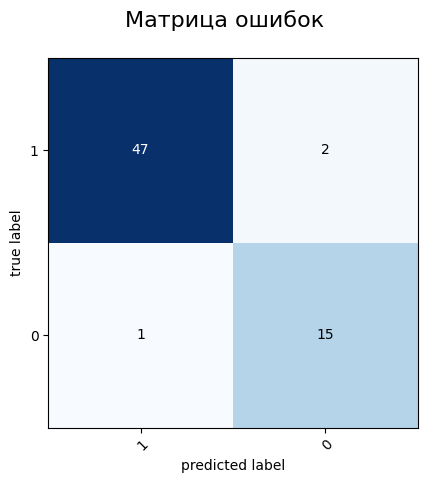

In [172]:
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, class_names=label_to_class_name)
plt.suptitle('Матрица ошибок', fontsize=16)
plt.show()

In [173]:
torch.save(model.state_dict(), "/content/drive/MyDrive/Colab Notebooks/wine_model.pth")

In [111]:
import torch
import torch.optim as optim
from torch import nn
import pandas as pd
import json

from art import tprint
from tqdm import tqdm
import mlflow
tprint("Wine_Classifier")

class WinePredictor:
    def __init__(self, model):
        self.model = model

    def predict(self, X_data):
        predictions = []
        self.model.eval()
        with torch.inference_mode():
            outputs = self.model(X_data)
            _, predicted = torch.max(outputs, 1)
            predicted_list = ['red' if value == 1 else 'white' for value in predicted.numpy()]
        return predicted_list

class WineClassifier(nn.Module, PythonModel):
    def __init__(self, input_size, hidden_size, output_size):
        super(WineClassifier, self).__init__()
        self.liner_1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.liner_2 = nn.Linear(hidden_size, 64)
        self.drop = nn.Dropout(0.1)
        self.fc = nn.Linear(64, output_size)

    def forward(self, x):
        out = self.liner_1(x)
        out = self.relu(out)
        out = self.drop(out)
        out = self.liner_2(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

input_size = 12
hidden_size = 32
output_size = 2
learning_rate = 0.001
num_epochs = 25
model = WineClassifier(input_size, hidden_size, output_size)
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
device = "cuda" if torch.cuda.is_available() else "cpu"

train(model, optimizer, criterion, train_loader, valid_loader, epochs=num_epochs, device=device)

with mlflow.start_run():
    params = {
        "epochs": num_epochs,
        "learning_rate": learning_rate,
        "batch_size": batch_size,
        "loss_function": criterion.__class__.__name__,
        "optimizer": optimizer.__class__.__name__,
        "input_size": 12,
        "hidden_size": 32,
        "output_size": 2,
        "device": device
    }
    # Log training parameters.
    mlflow.log_params(params)

    # Log model summary.
    with open("model_summary.txt", "w", encoding="utf-8") as f:
        f.write(str(summary(model)))
    mlflow.log_artifact("model_summary.txt")

    wine_predictor = WinePredictor(model)
    mlflow.pyfunc.log_model("model",
                            python_model=wine_predictor)

    # Save the function
    mlflow.pyfunc.save_model(path="path_to_save")

__        __ _                       ____  _                   _   __  _             
\ \      / /(_) _ __    ___         / ___|| |  __ _  ___  ___ (_) / _|(_)  ___  _ __ 
 \ \ /\ / / | || '_ \  / _ \       | |    | | / _` |/ __|/ __|| || |_ | | / _ \| '__|
  \ V  V /  | || | | ||  __/       | |___ | || (_| |\__ \\__ \| ||  _|| ||  __/| |   
   \_/\_/   |_||_| |_| \___| _____  \____||_| \__,_||___/|___/|_||_|  |_| \___||_|   
                            |_____|                                                  

Epoch: 0, Training Loss: 0.2457, Validation Loss: 0.2083, accuracy = 0.9304
Epoch: 1, Training Loss: 0.1823, Validation Loss: 0.2039, accuracy = 0.9312
Epoch: 2, Training Loss: 0.1671, Validation Loss: 0.1753, accuracy = 0.9344
Epoch: 3, Training Loss: 0.1637, Validation Loss: 0.1625, accuracy = 0.9441
Epoch: 4, Training Loss: 0.1475, Validation Loss: 0.1653, accuracy = 0.9433
Epoch: 5, Training Loss: 0.1404, Validation Loss: 0.1461, accuracy = 0.9530
Epoch: 6, Training Loss: 0.

MlflowException: `python_model` must be a PythonModel instance or a callable object